<ipython-input-1-321c3a85677a>:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['FREQUENCY (maximum)'] = df['FREQUENCY (maximum)'].replace({


Training Accuracy: 0.9658119658119658
Testing Accuracy: 0.9666666666666667


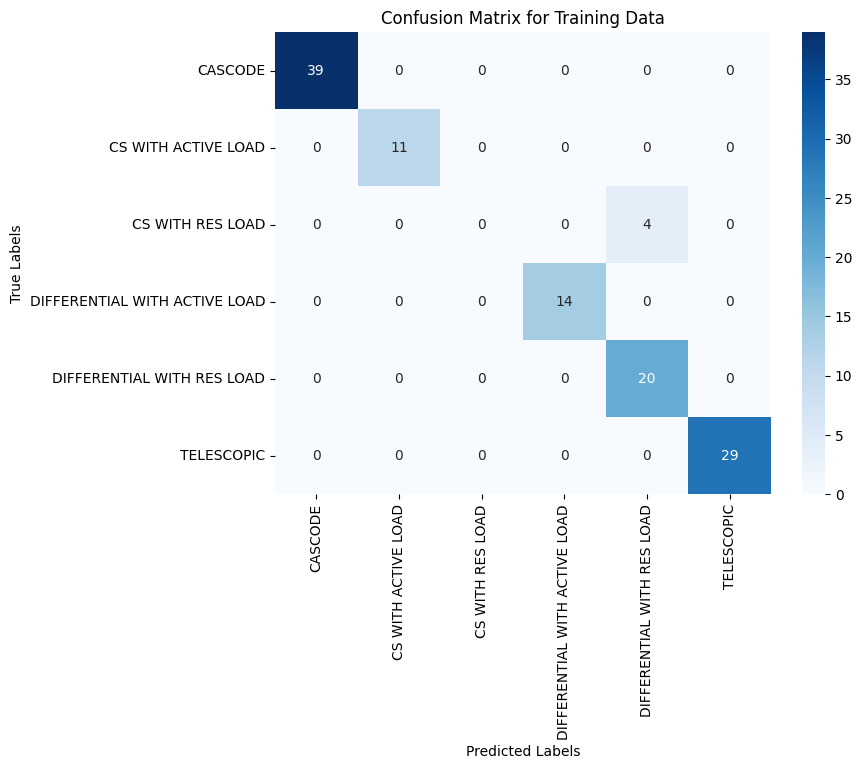

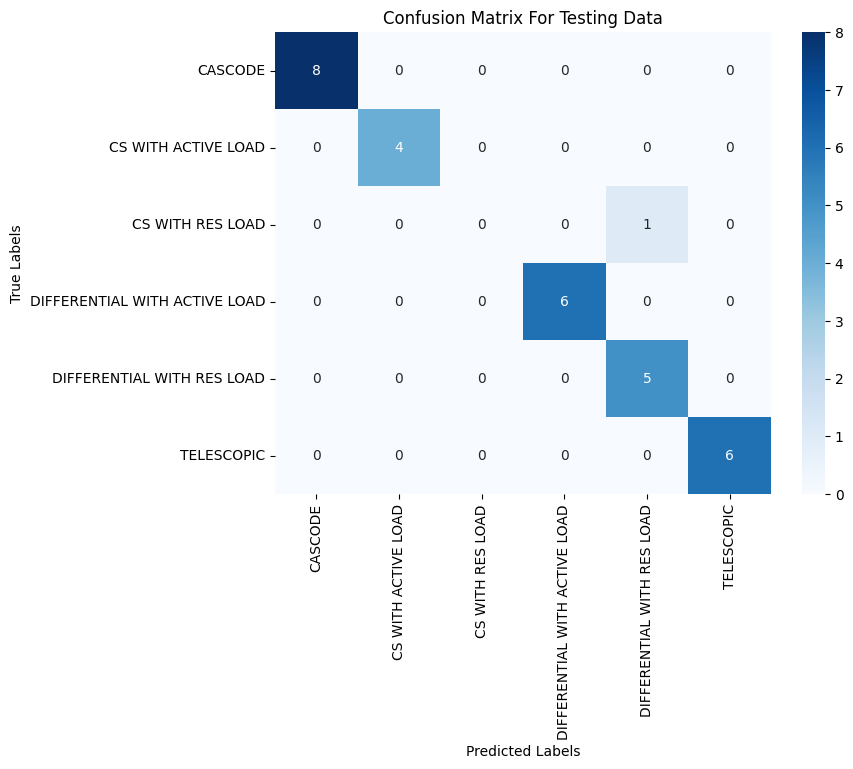


Predicted labels for test samples:


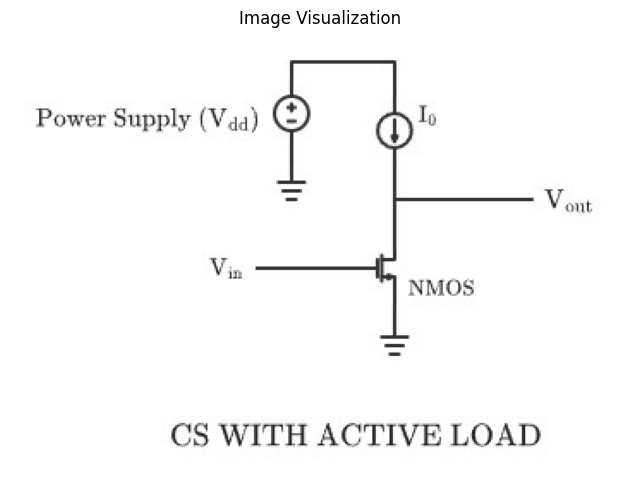

Input: [20, 100000.0, 1.2] -> Predicted FINAL AMPLIFIER: CS WITH ACTIVE LOAD


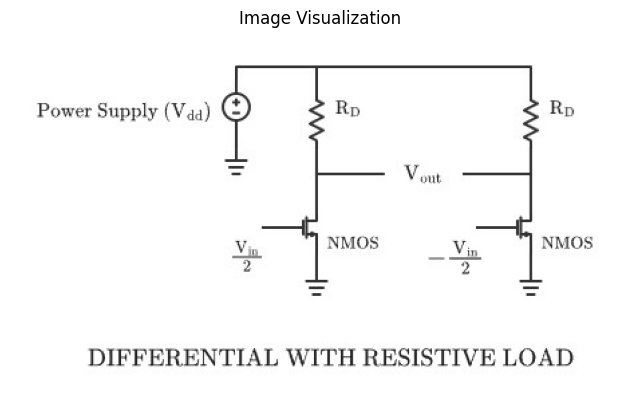

Input: [15, 200000.0, 1.5] -> Predicted FINAL AMPLIFIER: DIFFERENTIAL WITH RES LOAD


In [1]:

# Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.image as mpimg


# Load the Excel file

file_path = '/content/FINAL_DATA.xlsx'
sheet_name = 'Sheet1'

df = pd.read_excel(file_path, sheet_name=sheet_name)
df_cleaned = df.dropna()

cleaned_file_path = 'cleaned_file.xlsx'
df_cleaned.to_excel(cleaned_file_path, index=False)

df = df_cleaned.copy()


# Process the data

df['FREQUENCY (maximum)'] = df['FREQUENCY (maximum)'].replace({
    '100k': 1e5, '200k': 2e5, '300k': 3e5, '400k': 4e5, '500k': 5e5,
    '600k': 6e5, '700k': 7e5, '800k': 8e5, '900k': 9e5, '1M': 1e6,
    '10M': 1e7, '100M': 1e8, '1G': 1e9, '10G': 1e10, '100G': 1e11
})

label_encoder = LabelEncoder()

df['FINAL AMPLIFIER'] = label_encoder.fit_transform(df['FINAL AMPLIFIER'])

X = df.drop('FINAL AMPLIFIER', axis=1)
y = df['FINAL AMPLIFIER']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize and train Decision Tree Classifier

classifier = DecisionTreeClassifier(max_depth=5, random_state=42)  # Adjust max_depth as needed
classifier.fit(X_train, y_train)


# Calculate accuracies

train_accuracy = accuracy_score(y_train, classifier.predict(X_train))
test_accuracy = accuracy_score(y_test, classifier.predict(X_test))

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


# Plotting confusion matrix for training data

train_conf_matrix = confusion_matrix(y_train, classifier.predict(X_train))
plt.figure(figsize=(8, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Training Data')
plt.show()


# Plotting confusion matrix for testing data

conf_matrix = confusion_matrix(y_test, classifier.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix For Testing Data')
plt.show()


# Function to visualize an image from a given file path

def visualize_image(image_path):
    img = mpimg.imread(image_path)  # Read the image file
    plt.figure(figsize=(8, 8))  # Set the figure size
    plt.imshow(img)  # Display the image
    plt.axis('off')  # Turn off axis
    plt.title("Image Visualization")  # Set a title for the image
    plt.show()


# Function to execute code based on input label

def execute_label_action(label):
    if label == 'CASCODE':
        image_path = '/content/cascode.jpg'
        visualize_image(image_path)

    elif label == 'CS WITH ACTIVE LOAD':
        image_path = '/content/cs_act.jpg'
        visualize_image(image_path)

    elif label == 'CS WITH RES LOAD':
        image_path = '/content/cs_res.jpg'
        visualize_image(image_path)

    elif label == 'DIFFERENTIAL WITH ACTIVE LOAD':
        image_path = '/content/dif_act.jpg'
        visualize_image(image_path)

    elif label == 'DIFFERENTIAL WITH RES LOAD':
        image_path = '/content/dif_res.jpg'
        visualize_image(image_path)

    elif label == 'TELESCOPIC':
        image_path = '/content/tel.jpg'
        visualize_image(image_path)

    else:
        print("Label not recognized.")


# Result Verification

test_samples = [
    [20, 1e5, 1.2],
    [15, 2e5, 1.5]  # [GAIN (maximum), FREQUENCY (maximum), POWER SUPPLY (minimum)]
]

test_samples_df = pd.DataFrame(test_samples, columns=X.columns)

test_preds = classifier.predict(test_samples_df)

test_labels = label_encoder.inverse_transform(test_preds)

print("\nPredicted labels for test samples:")

for sample, label in zip(test_samples, test_labels):
    execute_label_action(label)
    print(f"Input: {sample} -> Predicted FINAL AMPLIFIER: {label}")